## HOMEWORK 12

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
# Load the training labels
root = 'C:/Users/A/Desktop/ComputerVision/course/HW_12/data' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

In [3]:
print(f'data shape is: {data.shape}\n')
print(f'data general info is:\n{data.info()}')
data.head(5)
#data.tail(5)

data shape is: (39209, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB
data general info is:
None


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


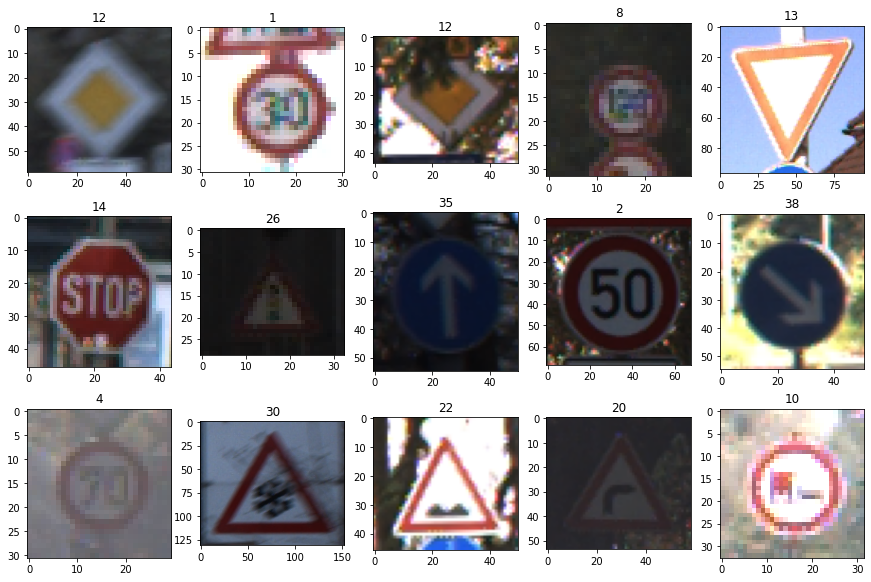

In [4]:
# Number of training samples (amount of samples in data)
num_samples, _ = data.shape

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

In [5]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']
num_classes = ids.nunique()

<AxesSubplot:title={'center':'Hist by ClassId'}, ylabel='Frequency'>

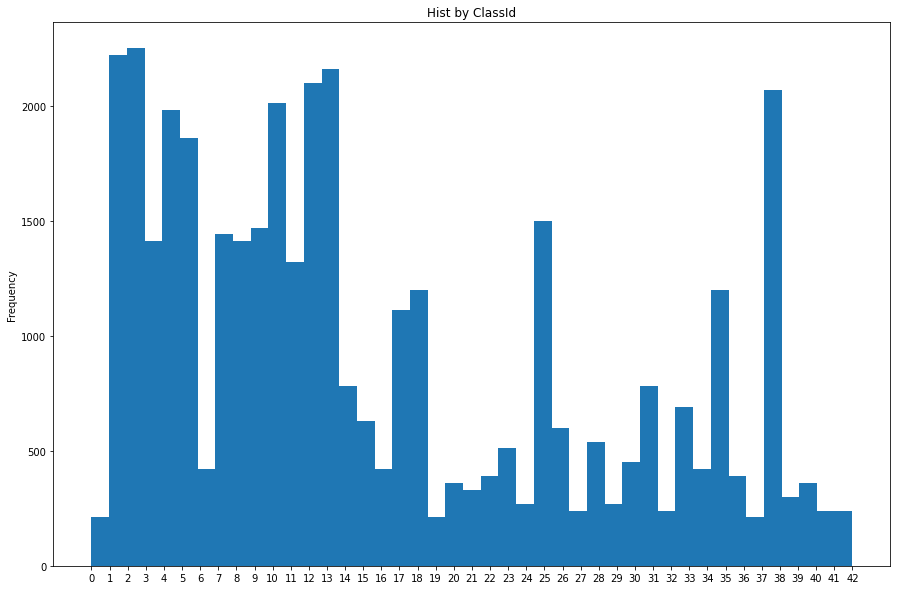

In [6]:
ids.plot.hist(bins=num_classes, title='Hist by ClassId', xticks=np.arange(0, num_classes))

In [7]:
# centers = np.arange(0, num_classes)
# counts, bounds = np.histogram(ids, bins=centers-0.5)

# plt.bar(centers[:-1], counts), plt.grid(True)
# plt.xlabel('Class ID'), plt.ylabel('counts')

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

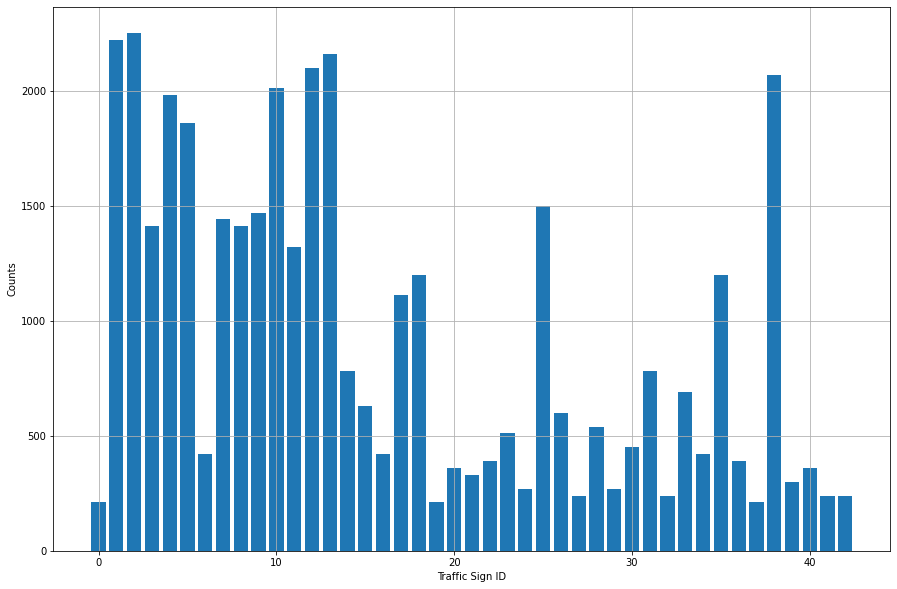

In [8]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

In [9]:
res = ids.value_counts(ascending=False)
_class, _value = res.index, res.values
print(res.to_dict())

{2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860, 25: 1500, 9: 1470, 7: 1440, 3: 1410, 8: 1410, 11: 1320, 18: 1200, 35: 1200, 17: 1110, 14: 780, 31: 780, 33: 689, 15: 630, 26: 600, 28: 540, 23: 510, 30: 450, 16: 420, 6: 420, 34: 420, 22: 390, 36: 390, 40: 360, 20: 360, 21: 330, 39: 300, 29: 270, 24: 270, 32: 240, 27: 240, 41: 240, 42: 240, 37: 210, 0: 210, 19: 210}


### Questions
Please answer the following questions:

- Do you consider the dataset to be balanced? If so, why? If not, why?
- Are there any classes that are (significantly) over-represented or under-represeneted?

### Answers
- Data is unbalanced because of high ratio max-to-min - hist and ratio, computed below, depict this:

In [10]:
print(f"max is: {res.max()}, min is: {res.min()}, max-to-min is: {res.max()/res.min()}")

max is: 2250, min is: 210, max-to-min is: 10.714285714285714


- The level to compare values in each class is a question. Let say, over-represented is **greater then 2*mean**, under-represented is **less then 0.5*mean**.

In [11]:
res.mean()

911.8372093023256

In [12]:
over_represented_level, under_represented_level = 2 * res.mean(), 0.5 * res.mean()
over_represented, under_represented = dict(), dict()
for key, val in res.items():
    if val > over_represented_level:
        over_represented.setdefault(key, val)
    elif val < under_represented_level:
        under_represented.setdefault(key, val)
print(f'over_represented:\n{over_represented}\n\nunder_represented:\n{under_represented}')

over_represented:
{2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860}

under_represented:
{30: 450, 16: 420, 6: 420, 34: 420, 22: 390, 36: 390, 40: 360, 20: 360, 21: 330, 39: 300, 29: 270, 24: 270, 32: 240, 27: 240, 41: 240, 42: 240, 37: 210, 0: 210, 19: 210}


### Bonus Task

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution? Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [13]:
resolution = data['Width'] * data['Height']

In [14]:
resolution_res = resolution.value_counts(ascending=False)

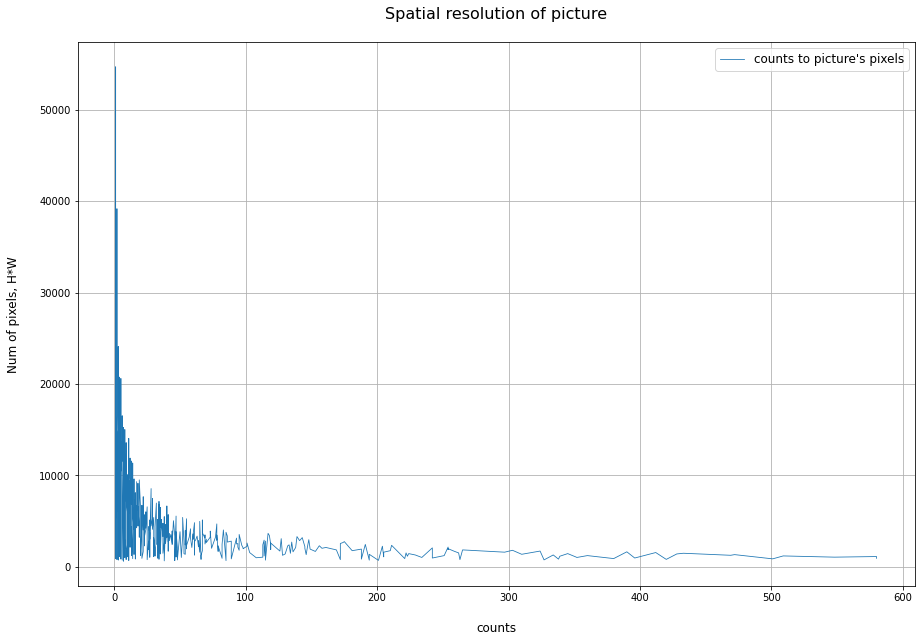

In [15]:
fig, ax1 = plt.subplots()
ax1.set_xlabel( "\ncounts", fontsize=12 )
ax1.set_ylabel( "Num of pixels, H*W\n", fontsize=12 )
plt.title("Spatial resolution of picture\n", fontsize=16 )
ax1.plot(resolution_res.values, resolution_res.index, label="counts to picture's pixels", linewidth=0.8)
ax1.grid(True)
ax1.legend(loc='upper right', fontsize=12)
#plt.savefig("counts to picture_s pixels.png")
plt.show()

In [16]:
resolution_res.index.max()/resolution_res.index.min()

87.48

Dataset has serious variance in picture spatial resolution, relation **max/min=87**, nearly two orders.

In [17]:
mean_val_of_brightness = list()
for idx in range(num_samples):
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mean_val_of_brightness.append(int(img.mean()))

In [18]:
mean_val_of_brightness_np = np.array(mean_val_of_brightness, dtype=np.int16)

In [19]:
mean_val_of_brightness_pandas_df = pd.DataFrame(mean_val_of_brightness_np, columns=['Mean value of img'])
print(type(mean_val_of_brightness_pandas_df))

<class 'pandas.core.frame.DataFrame'>


In [20]:
mean_val_of_brightness_pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Mean value of img  39209 non-null  int16
dtypes: int16(1)
memory usage: 76.7 KB


In [21]:
brightness_res = mean_val_of_brightness_pandas_df['Mean value of img'].value_counts(ascending=False)

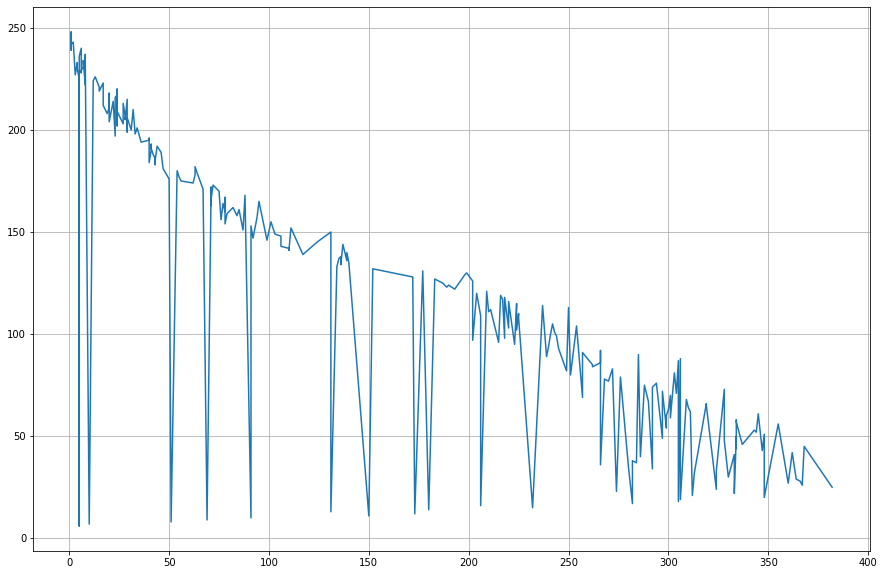

In [22]:
plt.plot(brightness_res.values, brightness_res.index)
plt.grid(True)

In [23]:
f'max: {brightness_res.index.max()}, min: {brightness_res.index.min()}'

'max: 248, min: 6'

In [24]:
f'max/min: {brightness_res.index.max()/brightness_res.index.min()}'

'max/min: 41.333333333333336'

Dataset has serious variance in brightness distribution, relation max/min=41.